<a href="https://colab.research.google.com/github/Varu-09/varalakshmi/blob/main/varunm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Testing.csv to Testing.csv


Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Testing.csv')
df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


Data Exploration

In [ ]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

Missing Values and Duplicates

In [ ]:
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
Duplicates: 0


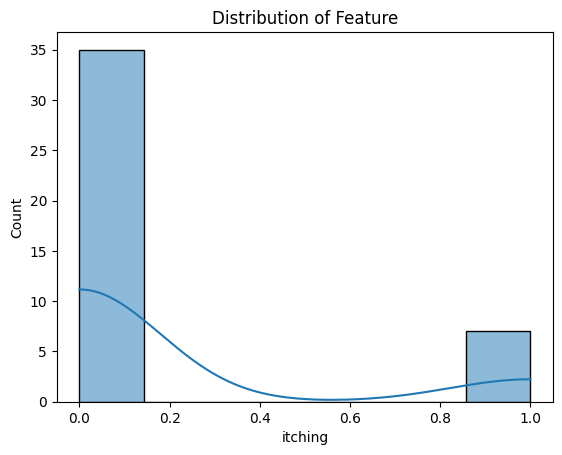

<Axes: xlabel='itching', ylabel='itching'>

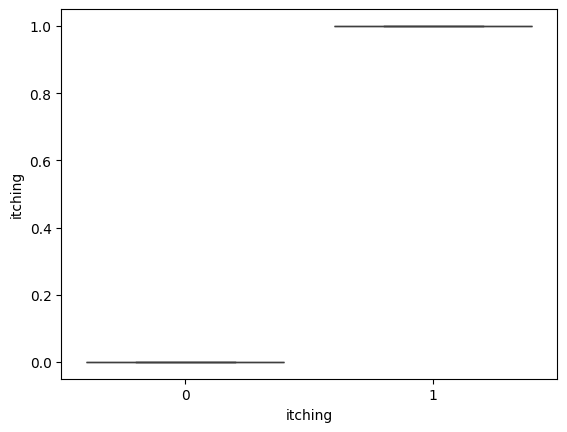

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['itching'], kde=True)
plt.title('Distribution of Feature')
plt.show()

sns.boxplot(x='itching', y='itching', data=df)

 Identify Target and Features

In [ ]:
X = df.drop('itching', axis=1)
y = df['itching']


Convert Categorical Columns to Numerical



In [ ]:
df.select_dtypes(include='object').columns


Index(['prognosis'], dtype='object')

One-Hot Encoding



In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


 Feature Scaling



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Check if 'itching_1' exists in the columns:
if 'itching_1' in df_encoded.columns:
    X_scaled = scaler.fit_transform(df_encoded.drop('itching_1', axis=1))
# If 'itching_1' doesn't exist, try 'itching':
else:
    X_scaled = scaler.fit_transform(df_encoded.drop('itching', axis=1))

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_encoded['itching'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Define new_input_dict with your data
new_input_dict = {'age': [30], 'gender': ['Male'], 'polyuria': ['Yes'], 'polydipsia': ['No'], 'sudden_weight_loss': ['Yes'], 'weakness': ['Yes'], 'polyphagia': ['No'], 'genital_thrush': ['No'], 'visual_blurring': ['No'], 'itching': ['No'], 'irritability': ['No'], 'delayed_healing': ['No'], 'partial_paresis': ['No'], 'muscle_stiffness': ['Yes'], 'alopecia': ['Yes'], 'obesity': ['Yes']}  # Example data

new_df = pd.DataFrame(new_input_dict)
new_df_encoded = pd.get_dummies(new_df)

In [ ]:
# Define new_input_dict with your data
new_input_dict = {'age': [30], 'gender': ['Male'], 'polyuria': ['Yes'], 'polydipsia': ['No'], 'sudden_weight_loss': ['Yes'], 'weakness': ['Yes'], 'polyphagia': ['No'], 'genital_thrush': ['No'], 'visual_blurring': ['No'], 'itching': ['No'], 'irritability': ['No'], 'delayed_healing': ['No'], 'partial_paresis': ['No'], 'muscle_stiffness': ['Yes'], 'alopecia': ['Yes'], 'obesity': ['Yes']}  # Example data

new_df = pd.DataFrame(new_input_dict)
# One-hot encode the new dataframe
new_df_encoded = pd.get_dummies(new_df, columns=list(new_df.select_dtypes(include=['object']).columns)) # Apply one-hot encoding to categorical features


# Get missing columns in the training data
missing_cols = set(df_encoded.columns) - set(new_df_encoded.columns)
# Add a missing column in test data
for c in missing_cols:
    new_df_encoded[c] = 0

# Ensure the order of column in the test data is in the same order than in train data
new_df_encoded = new_df_encoded[df_encoded.drop('itching', axis=1).columns]

# Now you should be able to predict using the new dataframe:
final_prediction = model.predict(scaler.transform(new_df_encoded)) # Use the encoded dataframe

<ipython-input-44-cce5abd745cd>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_encoded[c] = 0
<ipython-input-44-cce5abd745cd>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_encoded[c] = 0
<ipython-input-44-cce5abd745cd>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_enco

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install gradio
import gradio as gr
import pandas as pd

# Assuming df_encoded and scaler are defined from your previous cells
# ... (your existing code)

def predict_student_performance(age, gender, polyuria, polydipsia, sudden_weight_loss, weakness, polyphagia, genital_thrush, visual_blurring, itching, irritability, delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity):
    input_data = pd.DataFrame({
        'age': [age], 'gender': [gender], 'polyuria': [polyuria], 'polydipsia': [polydipsia],
        'sudden_weight_loss': [sudden_weight_loss], 'weakness': [weakness], 'polyphagia': [polyphagia],
        'genital_thrush': [genital_thrush], 'visual_blurring': [visual_blurring], 'itching': [itching],
        'irritability': [irritability], 'delayed_healing': [delayed_healing], 'partial_paresis': [partial_paresis],
        'muscle_stiffness': [muscle_stiffness], 'alopecia': [alopecia], 'obesity': [obesity]
    })
    encoded = pd.get_dummies(input_data, columns=list(input_data.select_dtypes(include=['object']).columns))

    # Get missing columns in the training data
    missing_cols = set(df_encoded.columns) - set(encoded.columns)


In [ ]:
prognosis_mapping = {idx: name for idx, name in enumerate(y.unique())}

def predict_disease(itching, skin_rash, nodal_skin_eruptions, continuous_sneezing,
                    shivering, chills, joint_pain, stomach_pain, acidity,
                    ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition,
                    spotting_urination, fatigue, weight_gain, anxiety,
                    cold_hands_and_feets, mood_swings, weight_loss):

    input_dict = {
        'itching': [itching],
        'skin_rash': [skin_rash],
        'nodal_skin_eruptions': [nodal_skin_eruptions],
        'continuous_sneezing': [continuous_sneezing],
        'shivering': [shivering],
        'chills': [chills],
        'joint_pain': [joint_pain],
        'stomach_pain': [stomach_pain],
        'acidity': [acidity],
        'ulcers_on_tongue': [ulcers_on_tongue],
        'muscle_wasting': [muscle_wasting],
        'vomiting': [vomiting],
        'burning_micturition': [burning_micturition],
        'spotting_ urination': [spotting_urination],
        'fatigue': [fatigue],
        'weight_gain': [weight_gain],
        'anxiety': [anxiety],
        'cold_hands_and_feets': [cold_hands_and_feets],
        'mood_swings': [mood_swings],
        'weight_loss': [weight_loss]
    }

    input_df = pd.DataFrame(input_dict)
    input_df = input_df.clip(lower=0) # No negative values
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)

    return str(prediction[0]) # Return disease name directly



In [ ]:
interface = gr.Interface(
    fn=predict_disease,
    inputs=[
        gr.Number(label="itching"),
        gr.Number(label="skin_rash"),
        gr.Number(label="nodal_skin_eruptions"),
        gr.Number(label="continuous_sneezing"),
        gr.Number(label="shivering"),
        gr.Number(label="chills"),
        gr.Number(label="joint_pain"),
        gr.Number(label="stomach_pain"),
        gr.Number(label="acidity"),
        gr.Number(label="ulcers_on_tongue"),
        gr.Number(label="muscle_wasting"),
        gr.Number(label="vomiting"),
        gr.Number(label="burning_micturition"),
        gr.Number(label="spotting_ urination"),
        gr.Number(label="fatigue"),
        gr.Number(label="weight_gain"),
        gr.Number(label="anxiety"),
        gr.Number(label="cold_hands_and_feets"),
        gr.Number(label="mood_swings"),
        gr.Number(label="weight_loss")
    ],
    outputs="text",
    title="💊 Disease Predictor",
    description="Predicts disease based on symptoms"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c59fe3bca1d0a5e8b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
